In [1]:

from mysql.connector import connect
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Kết nối tới database

In [2]:
conn = connect(
    host = 'mysql.laptrinhpython.net',
    user= 'hv',
    password='123456',
    database='vehiclestore',
    port = 3306    
)
conn.is_connected()

True

1. Thống kê số đơn bị huỷ

In [3]:
cursor = conn.cursor()
sql = 'select count(*) as SoLuong from orders \
    where status = "cancelled"'
cursor.execute(sql)
row = cursor.fetchall()
col = cursor.column_names
df_cau1 = pd.DataFrame(row,  col)
df_cau1.head()
# cursor.close()

,0
SoLuong,6


2. Liệt kê danh sách các nhân viên có chức danh công việc (jobTitle) bắt đầu
với chữ 'VP'. Sắp xếp tăng dần theo lastName

In [4]:

sql = 'select lastName, firstName, jobTitle, email, officeCode from employees \
   where jobTitle LIKE "VP%"\
       order by lastName'
cursor.execute(sql)
row = cursor.fetchall()
print(row)


[('Firrelli', 'Jeff', 'VP Marketing', 'jfirrelli@classicmodelcars.com', '1'), ('Patterson', 'Mary', 'VP Sales', 'mpatterso@classicmodelcars.com', '1')]


3. Liệt kê danh sách các nhân viên mà trong extension có 3 ký tự số

In [5]:
sql = 'select employeeNumber, lastName, firstName,extension, jobTitle  from employees \
     where extension LIKE "x___"'
cursor.execute(sql)
for row in cursor.fetchall():
    print(row)



(1504, 'Jones', 'Barry', 'x102', 'Sales Rep')
(1611, 'Fixter', 'Andy', 'x101', 'Sales Rep')
(1612, 'Marsh', 'Peter', 'x102', 'Sales Rep')
(1619, 'King', 'Tom', 'x103', 'Sales Rep')
(1621, 'Nishi', 'Mami', 'x101', 'Sales Rep')
(1625, 'Kato', 'Yoshimi', 'x102', 'Sales Rep')


4. Tính tổng tiền của các đơn hàng đã giao

In [6]:
sql = 'select ORD.orderNumber as orderNumber, ORD.status as status, SUM(ORD_D.priceEach * ORD_D.quantityOrdered) as ThanhTien \
        from orders ORD inner join orderdetails ORD_D \
        on ORD.orderNumber = ORD_D.orderNumber\
        where ORD.status = "Shipped" \
        group by orderNumber'
cursor.execute(sql)
rows = cursor.fetchall()
print(len(row))
for row in rows:
    print(row)

5
(10100, 'Shipped', Decimal('10223.83'))
(10101, 'Shipped', Decimal('10549.01'))
(10102, 'Shipped', Decimal('5494.78'))
(10103, 'Shipped', Decimal('50218.95'))
(10104, 'Shipped', Decimal('40206.20'))
(10105, 'Shipped', Decimal('53959.21'))
(10106, 'Shipped', Decimal('52151.81'))
(10107, 'Shipped', Decimal('22292.62'))
(10108, 'Shipped', Decimal('51001.22'))
(10109, 'Shipped', Decimal('25833.14'))
(10110, 'Shipped', Decimal('48425.69'))
(10111, 'Shipped', Decimal('16537.85'))
(10112, 'Shipped', Decimal('7674.94'))
(10113, 'Shipped', Decimal('11044.30'))
(10114, 'Shipped', Decimal('33383.14'))
(10115, 'Shipped', Decimal('21665.98'))
(10116, 'Shipped', Decimal('1627.56'))
(10117, 'Shipped', Decimal('44380.15'))
(10118, 'Shipped', Decimal('3101.40'))
(10119, 'Shipped', Decimal('35826.33'))
(10120, 'Shipped', Decimal('45864.03'))
(10121, 'Shipped', Decimal('16700.47'))
(10122, 'Shipped', Decimal('50824.66'))
(10123, 'Shipped', Decimal('14571.44'))
(10124, 'Shipped', Decimal('32641.98'))
(1

5. Liệt kê các nhân viên có lastName bị trùng

In [7]:
sql = 'select lastName, count(*) as SoLan from employees \
    group by lastName \
        having count(*) > 1 ' 
cursor.execute(sql)
for row in cursor.fetchall():
    print(row)
    


('Patterson', 3)
('Firrelli', 2)
('Bondur', 2)


6. Liệt kê những đơn hàng có từ 15 sản phẩm trở lên ****

In [23]:
sql = 'select orderNumber as orderNumber, count(*)as SoLuong \
        from orderdetails \
        group by orderNumber \
        having SoLuong >= 15  \
            order by SoLuong asc'
        
cursor.execute(sql)
rows = cursor.fetchall()
print(len(rows))
for row in rows:
    print(row)

57
(10127, 15)
(10223, 15)
(10227, 15)
(10211, 15)
(10266, 15)
(10273, 15)
(10208, 15)
(10314, 15)
(10321, 15)
(10329, 15)
(10120, 15)
(10363, 15)
(10375, 15)
(10105, 15)
(10193, 16)
(10207, 16)
(10212, 16)
(10103, 16)
(10262, 16)
(10308, 16)
(10339, 16)
(10390, 16)
(10192, 16)
(10143, 16)
(10142, 16)
(10145, 16)
(10167, 16)
(10173, 16)
(10110, 16)
(10108, 16)
(10185, 16)
(10350, 17)
(10122, 17)
(10373, 17)
(10126, 17)
(10135, 17)
(10312, 17)
(10310, 17)
(10204, 17)
(10304, 17)
(10287, 17)
(10280, 17)
(10306, 17)
(10182, 17)
(10210, 17)
(10181, 17)
(10398, 18)
(10106, 18)
(10386, 18)
(10360, 18)
(10222, 18)
(10168, 18)
(10332, 18)
(10165, 18)
(10159, 18)
(10316, 18)
(10275, 18)


7. Liệt kê những khách hàng có 2 địa chỉ. Sắp xếp tăng dần theo customerName

In [9]:
sql = 'select customerNumber, customerName, addressLine1, addressLine2 \
        from customers \
        where addressLine1 is not null and addressLine2 is not null \
        order by customerName asc'
cursor.execute(sql)
rows = cursor.fetchall()
print(len(rows))
for row in rows:
    print(row)


22
(168, 'American Souvenirs Inc', '149 Spinnaker Dr.', 'Suite 101')
(276, "Anna's Decorations, Ltd", '201 Miller Street', 'Level 15')
(206, 'Asian Shopping Network, Co', 'Suntec Tower Three', '8 Temasek')
(114, 'Australian Collectors, Co.', '636 St Kilda Road', 'Level 3')
(344, 'CAF Imports', 'Merchants House', "27-30 Merchant's Quay")
(424, 'Classic Legends Inc.', '5905 Pompton St.', 'Suite 750')
(189, 'Clover Collections, Co.', '25 Maiden Lane', 'Floor No. 4')
(385, 'Cruz & Sons Co.', '15 McCallum Street', 'NatWest Center #13-03')
(323, 'Down Under Souveniers, Inc', '162-164 Grafton Road', 'Level 2')
(148, 'Dragon Souveniers, Ltd.', 'Bronz Sok.', 'Bronz Apt. 3/6 Tesvikiye')
(412, 'Extreme Desk Decorations, Ltd', '101 Lambton Quay', 'Level 11')
(473, 'Frau da Collezione', '20093 Cologno Monzese', 'Alessandro Volta 16')
(240, 'giftsbymail.co.uk', 'Garden House', 'Crowther Way 23')
(166, 'Handji Gifts& Co', '106 Linden Road Sandown', '2nd Floor')
(167, 'Herkku Gifts', 'Brehmen St. 121'

8. Liệt kê danh sách các nhân viên với các số lượng các đơn hàng đã được giao
thành công (Shipped). Sắp xếp giảm dần theo số lượng đơn hàng

In [10]:
sql = 'select EMP.employeeNumber as employeeNumber, EMP.lastName as lastName, EMP.firstName as firstName, count(ORD.orderNumber) as NumberOfOrders \
        from employees EMP inner join customers CUS \
        on EMP.employeeNumber = CUS.salesRepEmployeeNumber \
        inner join orders ORD on CUS.customerNumber = ORD.customerNumber \
        where ORD.status = "shipped"    \
        group by employeeNumber\
        order by NumberOfOrders desc'
cursor.execute(sql)
rows = cursor.fetchall()
print(len(rows))
for row in rows:
    print(row)

15
(1370, 'Hernandez', 'Gerard', 38)
(1165, 'Jennings', 'Leslie', 32)
(1401, 'Castillo', 'Pamela', 27)
(1504, 'Jones', 'Barry', 23)
(1501, 'Bott', 'Larry', 21)
(1323, 'Vanauf', 'George', 20)
(1337, 'Bondur', 'Loui', 20)
(1286, 'Tseng', 'Foon Yue', 17)
(1611, 'Fixter', 'Andy', 17)
(1612, 'Marsh', 'Peter', 17)
(1216, 'Patterson', 'Steve', 16)
(1621, 'Nishi', 'Mami', 16)
(1188, 'Firrelli', 'Julie', 14)
(1166, 'Thompson', 'Leslie', 13)
(1702, 'Gerard', 'Martin', 12)


9. Thống kê số lượng và tổng tiền của từng đơn hàng. Lọc ra các đơn hàng có
tổng tiền lớn hơn 30000

In [11]:
sql = 'select ORD.orderNumber as orderNumber, SUM(ORD_D.quantityOrdered)as SoLuong , SUM(ORD_D.quantityOrdered * ORD_D.priceEach) as TongTien\
        from orders ORD inner join orderdetails ORD_D \
        on ORD.orderNumber = ORD_D.orderNumber\
        group by orderNumber \
        having TongTien > 30000  \
            order by orderNumber asc'
        
cursor.execute(sql)
rows = cursor.fetchall()
print(len(rows))
for row in rows:
    print(row)

164
(10103, Decimal('541'), Decimal('50218.95'))
(10104, Decimal('443'), Decimal('40206.20'))
(10105, Decimal('545'), Decimal('53959.21'))
(10106, Decimal('675'), Decimal('52151.81'))
(10108, Decimal('561'), Decimal('51001.22'))
(10110, Decimal('570'), Decimal('48425.69'))
(10114, Decimal('351'), Decimal('33383.14'))
(10117, Decimal('402'), Decimal('44380.15'))
(10119, Decimal('442'), Decimal('35826.33'))
(10120, Decimal('525'), Decimal('45864.03'))
(10122, Decimal('545'), Decimal('50824.66'))
(10124, Decimal('448'), Decimal('32641.98'))
(10126, Decimal('617'), Decimal('57131.92'))
(10127, Decimal('540'), Decimal('58841.35'))
(10135, Decimal('607'), Decimal('55601.84'))
(10138, Decimal('420'), Decimal('32077.44'))
(10140, Decimal('385'), Decimal('38675.13'))
(10142, Decimal('577'), Decimal('56052.56'))
(10143, Decimal('524'), Decimal('41016.75'))
(10145, Decimal('563'), Decimal('50342.74'))
(10147, Decimal('341'), Decimal('32680.31'))
(10148, Decimal('430'), Decimal('41554.73'))
(10150

10.Thống kê các đơn hàng đã giao có tổng tiền > 15000

In [12]:
sql = 'select ORD.orderNumber as orderNumber, ORD.status as status , SUM(ORD_D.quantityOrdered * ORD_D.priceEach) as TongTien\
        from orders ORD inner join orderdetails ORD_D \
        on ORD.orderNumber = ORD_D.orderNumber\
        group by orderNumber \
        having TongTien > 15000 AND status = "shipped" \
        order by orderNumber asc'
        
cursor.execute(sql)
rows = cursor.fetchall()
print(len(rows))
for row in rows:
    print(row)

235
(10103, 'Shipped', Decimal('50218.95'))
(10104, 'Shipped', Decimal('40206.20'))
(10105, 'Shipped', Decimal('53959.21'))
(10106, 'Shipped', Decimal('52151.81'))
(10107, 'Shipped', Decimal('22292.62'))
(10108, 'Shipped', Decimal('51001.22'))
(10109, 'Shipped', Decimal('25833.14'))
(10110, 'Shipped', Decimal('48425.69'))
(10111, 'Shipped', Decimal('16537.85'))
(10114, 'Shipped', Decimal('33383.14'))
(10115, 'Shipped', Decimal('21665.98'))
(10117, 'Shipped', Decimal('44380.15'))
(10119, 'Shipped', Decimal('35826.33'))
(10120, 'Shipped', Decimal('45864.03'))
(10121, 'Shipped', Decimal('16700.47'))
(10122, 'Shipped', Decimal('50824.66'))
(10124, 'Shipped', Decimal('32641.98'))
(10126, 'Shipped', Decimal('57131.92'))
(10127, 'Shipped', Decimal('58841.35'))
(10129, 'Shipped', Decimal('29429.14'))
(10131, 'Shipped', Decimal('17032.29'))
(10133, 'Shipped', Decimal('22366.04'))
(10134, 'Shipped', Decimal('23419.47'))
(10135, 'Shipped', Decimal('55601.84'))
(10138, 'Shipped', Decimal('32077.44

11.Tìm khách hàng có số tiền thanh toán cao nhất

In [13]:
sql = 'select customerNumber, checkNumber, amount \
        from payments \
        where amount = (select max(amount) from payments)'
cursor.execute(sql)
rows = cursor.fetchall()
print(len(rows))
for row in rows:
    print(row)

1
(141, 'JE105477', Decimal('120166.58'))


12.Liệt kê các nhân viên làm việc ở các văn phòng tại quốc gia USA

In [14]:
sql = 'select employeeNumber, lastName, firstName, officeCode \
    from employees \
    where officeCode in (select officeCode from offices where country = "USA") \
    order by employeeNumber asc'
    
cursor.execute(sql)
rows = cursor.fetchall()
print(len(rows))
for row in rows:
    print(row)

10
(1002, 'Murphy', 'Diane', '1')
(1056, 'Patterson', 'Mary', '1')
(1076, 'Firrelli', 'Jeff', '1')
(1143, 'Bow', 'Anthony', '1')
(1165, 'Jennings', 'Leslie', '1')
(1166, 'Thompson', 'Leslie', '1')
(1188, 'Firrelli', 'Julie', '2')
(1216, 'Patterson', 'Steve', '2')
(1286, 'Tseng', 'Foon Yue', '3')
(1323, 'Vanauf', 'George', '3')


13.Liệt kê danh sách những khách hàng chưa từng đặt hàng


In [15]:
sql = 'select customerNumber, customerName, country \
        from customers \
        where customerNumber not in (select distinct customerNumber from orders)\
        order by customerName asc'
cursor.execute(sql)
rows = cursor.fetchall()
print(len(rows))
for row in rows:
    print(row)

24
(168, 'American Souvenirs Inc', 'USA')
(237, 'ANG Resellers', 'Spain')
(465, 'Anton Designs, Ltd.', 'Spain')
(206, 'Asian Shopping Network, Co', 'Singapore')
(348, 'Asian Treasures, Inc.', 'Ireland')
(293, 'BG&E Collectables', 'Switzerland')
(335, 'Cramer Spezialitäten, Ltd', 'Germany')
(307, 'Der Hund Imports', 'Germany')
(443, 'Feuer Online Stores, Inc', 'Germany')
(273, 'Franken Gifts, Co', 'Germany')
(125, 'Havel & Zbyszek Co', 'Poland')
(361, 'Kommission Auto', 'Germany')
(480, 'Kremlin Collectables, Co.', 'Russia')
(369, 'Lisboa Souveniers, Inc', 'Portugal')
(247, 'Messner Shopping Network', 'Germany')
(477, 'Mit Vergnügen & Co.', 'Germany')
(223, 'Natürlich Autos', 'Germany')
(169, 'Porto Imports Co.', 'Portugal')
(376, 'Precious Collectables', 'Switzerland')
(481, 'Raanan Stores, Inc', 'Israel')
(356, 'SAR Distributors, Co', 'South Africa')
(303, 'Schuyler Imports', 'Netherlands')
(409, 'Stuttgart Collectable Exchange', 'Germany')
(459, 'Warburg Exchange', 'Germany')


14.Thống kê số lượng của các trạng thái qua các năm


In [16]:
sql = '\
select year(orderdate) as year, \
count(case when status = "shipped" then 1 end) as shipped, \
count(case when status = "cancelled" then 1 end) as cancelled, \
count(case when status = "on hold" then 1 end) as onhold,\
count(case when status = "resolved" then 1 end) as resolved,\
count(case when status = "in process" then 1 end) as inprocess,\
count(case when status = "disputed" then 1 end) as disputed \
from orders \
group by year(orderdate) \
order by year(orderdate) asc'
cursor.execute(sql)
rows = cursor.fetchall()
print(len(rows))
for row in rows:
    print(row)

3
(2003, 108, 2, 0, 1, 0, 0)
(2004, 145, 4, 1, 1, 0, 0)
(2005, 50, 0, 3, 2, 6, 3)


15.Thống kê các khách hàng ở USA và France

In [17]:
sql = 'select customerNumber, customerName, country \
        from customers \
        where country in ("USA","FRANCE")\
        order by customerNumber asc'
cursor.execute(sql)
rows = cursor.fetchall()
print(len(rows))
for row in rows:
    print(row)

48
(103, 'Atelier graphique', 'France')
(112, 'Signal Gift Stores', 'USA')
(119, 'La Rochelle Gifts', 'France')
(124, 'Mini Gifts Distributors Ltd.', 'USA')
(129, 'Mini Wheels Co.', 'USA')
(131, 'Land of Toys Inc.', 'USA')
(146, 'Saveley & Henriot, Co.', 'France')
(151, 'Muscle Machine Inc', 'USA')
(157, 'Diecast Classics Inc.', 'USA')
(161, 'Technics Stores Inc.', 'USA')
(168, 'American Souvenirs Inc', 'USA')
(171, 'Daedalus Designs Imports', 'France')
(172, "La Corne D'abondance, Co.", 'France')
(173, 'Cambridge Collectables Co.', 'USA')
(175, 'Gift Depot Inc.', 'USA')
(181, 'Vitachrome Inc.', 'USA')
(198, 'Auto-Moto Classics Inc.', 'USA')
(204, 'Online Mini Collectables', 'USA')
(205, 'Toys4GrownUps.com', 'USA')
(209, 'Mini Caravy', 'France')
(219, 'Boards & Toys Co.', 'USA')
(239, 'Collectable Mini Designs Co.', 'USA')
(242, 'Alpha Cognac', 'France')
(250, 'Lyon Souveniers', 'France')
(256, 'Auto Associés & Cie.', 'France')
(286, "Marta's Replicas Co.", 'USA')
(319, 'Mini Classics'

16.Liệt kê các đơn hàng thuộc dòng sản phẩm xe ô tô đã được giao vào năm
2005. Sắp xếp tăng dần theo ngày giao hàng (shippedDate)


In [18]:
sql = 'select ORD.ordernumber as orderNumber, ORD.orderdate as orderDate, ORD.shippeddate as shippeddate, ORD.status as status, ORD_D.productcode as productCode, PRO.productName as productName,PRO.productLine as productLine  \
    from orders ORD inner join orderdetails ORD_D \
    on ORD.orderNumber = ORD_D.orderNumber \
    inner join products PRO \
    on ORD_D.productCode = PRO.productCode \
    where year(orderdate) = 2005 and status = "shipped" and productLine like "%cars" \
    order by shippeddate asc'
cursor.execute(sql)
rows = cursor.fetchall()
print(len(rows))
for row in rows:
    print(row)

218
(10363, datetime.date(2005, 1, 6), datetime.date(2005, 1, 10), 'Shipped', 'S12_1099', '1968 Ford Mustang', 'Classic Cars')
(10363, datetime.date(2005, 1, 6), datetime.date(2005, 1, 10), 'Shipped', 'S12_3380', '1968 Dodge Charger', 'Classic Cars')
(10363, datetime.date(2005, 1, 6), datetime.date(2005, 1, 10), 'Shipped', 'S12_3990', '1970 Plymouth Hemi Cuda', 'Classic Cars')
(10363, datetime.date(2005, 1, 6), datetime.date(2005, 1, 10), 'Shipped', 'S12_4675', '1969 Dodge Charger', 'Classic Cars')
(10363, datetime.date(2005, 1, 6), datetime.date(2005, 1, 10), 'Shipped', 'S18_1889', '1948 Porsche 356-A Roadster', 'Classic Cars')
(10363, datetime.date(2005, 1, 6), datetime.date(2005, 1, 10), 'Shipped', 'S18_3278', '1969 Dodge Super Bee', 'Classic Cars')
(10363, datetime.date(2005, 1, 6), datetime.date(2005, 1, 10), 'Shipped', 'S18_3482', '1976 Ford Gran Torino', 'Classic Cars')
(10363, datetime.date(2005, 1, 6), datetime.date(2005, 1, 10), 'Shipped', 'S18_4721', '1957 Corvette Convertib

17.Liệt kê danh sách những nhân viên bán hàng (Sales Rep) chưa có khách hàng

In [19]:
sql = 'select EMP.employeeNumber, EMP.lastname, EMP.firstname, OFF.addressline1 AS officeaddressline1, OFF.addressline2 as officeadressline2\
    from employees EMP inner join offices OFF  on EMP.officecode = OFF.officecode\
    where EMP.employeenumber not in (select distinct salesrepemployeenumber from customers where salesrepemployeenumber is not null) and EMP.jobtitle = "sales rep"\
    order by EMP.employeeNumber asc'
    
cursor.execute(sql)
rows = cursor.fetchall()
print(len(rows))
for row in rows:
    print(row)

2
(1619, 'King', 'Tom', '5-11 Wentworth Avenue', 'Floor #2')
(1625, 'Kato', 'Yoshimi', '4-1 Kioicho', None)


18.Cho biết các mã thanh toán và thời gian thanh toán của các sản phẩm thuộc
dòng 'Classic Cars'

In [20]:
sql = '\
     with Total_paycheck as( \
     select PAY.checknumber as checkNumber, PAY.paymentdate as paymentDate \
     from payments PAY inner join customers CUS \
     on PAY.customernumber = CUS.customernumber \
     inner join orders ORD \
    on CUS.customernumber = ORD.customernumber \
    inner join orderdetails ORD_D \
     on ORD.orderNumber = ORD_D.orderNumber \
    inner join products PRO \
     on ORD_D.productCode = PRO.productCode \
    where PRO.productline = "classic cars") \
     select distinct checkNumber, paymentDate from Total_paycheck\
         '
cursor.execute(sql)
rows = cursor.fetchall()
print(len(rows))
for row in rows:
    print(row)

266
('DB889831', datetime.date(2003, 2, 16))
('FD317790', datetime.date(2003, 10, 28))
('KI831359', datetime.date(2004, 11, 4))
('MA302151', datetime.date(2004, 11, 28))
('IR846303', datetime.date(2004, 12, 12))
('LA685678', datetime.date(2003, 4, 9))
('DD995006', datetime.date(2004, 11, 15))
('NA377824', datetime.date(2004, 2, 6))
('OO606861', datetime.date(2003, 6, 13))
('BR352384', datetime.date(2004, 11, 14))
('BR478494', datetime.date(2003, 11, 18))
('KG644125', datetime.date(2005, 2, 2))
('NI908214', datetime.date(2003, 8, 5))
('BI507030', datetime.date(2003, 4, 22))
('DD635282', datetime.date(2004, 8, 11))
('KM172879', datetime.date(2003, 12, 26))
('ME497970', datetime.date(2005, 3, 27))
('KF480160', datetime.date(2004, 12, 7))
('LM271923', datetime.date(2003, 4, 16))
('OA595449', datetime.date(2003, 10, 31))
('HL209210', datetime.date(2003, 11, 15))
('JK479662', datetime.date(2003, 10, 17))
('NF959653', datetime.date(2005, 3, 1))
('AP286625', datetime.date(2004, 10, 24))
('DA98

19.Thống kê số lượng đơn hàng qua các năm và trực quan bằng biểu đồ

3
(2003, 111)
(2004, 151)
(2005, 64)


Text(0, 0.5, 'Số lượng')

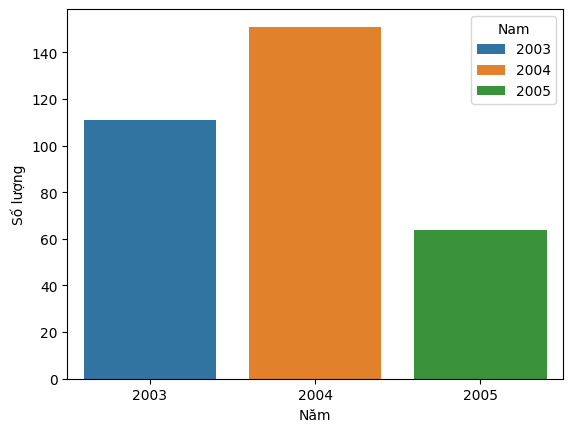

In [21]:
sql = 'select year(orderdate) as Nam, count(orderNumber) as SoLuong \
        from orders \
        group by year(orderdate) \
        order by year(orderdate) asc'   
cursor.execute(sql)
rows = cursor.fetchall()
print(len(rows))
for row in rows:
    print(row)
sns.barplot(x='Nam', y='SoLuong', data = pd.DataFrame(rows, columns= cursor.column_names), hue = 'Nam', palette= ['#1f77b4', '#ff7f0e', '#2ca02c']) 
plt.xlabel('Năm')
plt.ylabel('Số lượng')
# plt.color_sequences = 'viridis'

20.Thống kê 10 khách hàng có số đơn đặt hàng nhiều nhất

10
('Euro+ Shopping Channel', 26)
('Mini Gifts Distributors Ltd.', 17)
('Down Under Souveniers, Inc', 5)
('Dragon Souveniers, Ltd.', 5)
('Australian Collectors, Co.', 5)
('Reims Collectables', 5)
('Danish Wholesale Imports', 5)
('Baane Mini Imports', 4)
('Blauer See Auto, Co.', 4)
("Kelly's Gift Shop", 4)


Text(0.5, 1.0, 'Top 10 khách hàng có nhiều đơn ĐH nhất')

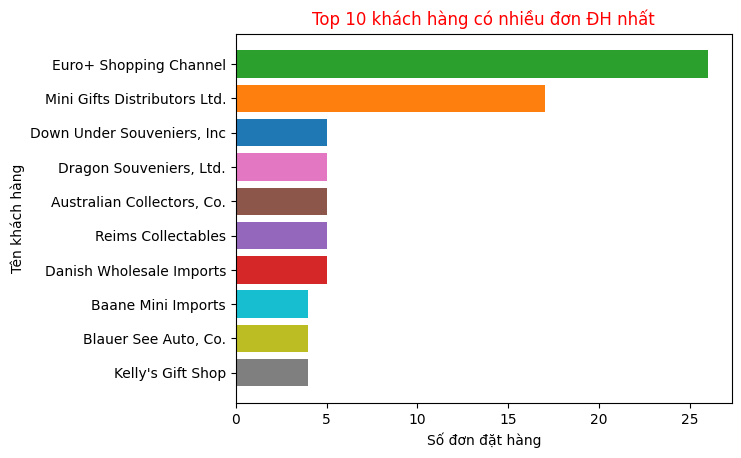

In [22]:
sql = 'select CUS.customerName as customerName, count(ORD.orderNumber) as count_order \
        from customers CUS inner join orders ORD \
        on CUS.customerNumber = ORD.customerNumber \
        group by customerName \
        order by count_order desc \
        limit 10'
cursor.execute(sql)
rows = cursor.fetchall()
print(len(rows))
for row in rows:
    print(row)
df = pd.DataFrame(rows, columns= cursor.column_names)
df.head()
plt.barh( y= 'customerName', data = df.iloc[::-1] , width = 'count_order', color = [ '#7f7f7f', '#bcbd22', '#17becf', '#d62728', '#9467bd',
             '#8c564b', '#e377c2','#1f77b4', '#ff7f0e', '#2ca02c'])
plt.xlabel('Số đơn đặt hàng')
plt.ylabel('Tên khách hàng')
plt.title('Top 10 khách hàng có nhiều đơn ĐH nhất',color = 'red')